<a href="https://colab.research.google.com/github/sakyamana/2048/blob/master/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import ipywidgets as widgets

In [5]:
import pandas as pd

file_path = "/content/heart.csv"
heart_dataframe = pd.read_csv(file_path)

# Display the dataframe
heart_dataframe


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
# Preview the data
display(heart_dataframe.info())
display(heart_dataframe.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


None

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
heart_dataframe["age_numeric"] = heart_dataframe["age"]


In [10]:
def parse_age(age_str):
    if isinstance(age_str, str):
        if '+' in age_str:
            return 85  # Approximation for '80+'
        try:
            parts = age_str.split(' - ')
            return (int(parts[0]) + int(parts[1])) / 2
        except:
            return None
    return None  # Return None for non-string entries

# Apply if age is in string format (like "40 - 49" or "80+")
heart_dataframe["age_numeric"] = heart_dataframe["age"].apply(parse_age)

heart_dataframe


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_numeric
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,None
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,None
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,None
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,None
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,None
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,None
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,None
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,None


In [11]:
print("Rows with missing/null values")
display(heart_dataframe[heart_dataframe[['age', 'chol']].isnull().any(axis=1)])

# Remove rows with missing values in age or chol
heart_dataframe = heart_dataframe.dropna(subset=['age', 'chol'])

# Show the cleaned data
heart_dataframe


Rows with missing/null values


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_numeric


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_numeric
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,None
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,None
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,None
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,None
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,None
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,None
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,None
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,None


In [12]:
heart_dataframe.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [13]:
heart_dataframe_filtered = heart_dataframe.dropna(subset=["age", "chol"])
display(heart_dataframe_filtered[heart_dataframe_filtered[["age", "chol"]].isnull().any(axis=1)])


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_numeric


In [14]:
# Total count by sex
gender_cases = heart_dataframe_filtered["sex"].value_counts()

# Distribution of age
age_group_cases = heart_dataframe_filtered["age"].value_counts().sort_index()

# Optional: if you have a timestamp/date column (e.g., "date"), convert and group
# heart_dataframe_filtered["date"] = pd.to_datetime(heart_dataframe_filtered["date"])
# cases_over_time = heart_dataframe_filtered.groupby("date").size()

# If dataset has a 'target' column (0 = no disease, 1 = disease), we can group by that
cases_by_target = heart_dataframe_filtered["target"].value_counts()

print("Gender distribution:\n", gender_cases, "\n")
print("Age distribution:\n", age_group_cases, "\n")
print("Target (disease presence) distribution:\n", cases_by_target, "\n")


Gender distribution:
 sex
1    713
0    312
Name: count, dtype: int64 

Age distribution:
 age
29     4
34     6
35    15
37     6
38    12
39    14
40    11
41    32
42    26
43    26
44    36
45    25
46    23
47    18
48    23
49    17
50    21
51    39
52    43
53    26
54    53
55    30
56    39
57    57
58    68
59    46
60    37
61    31
62    37
63    32
64    34
65    27
66    25
67    31
68    12
69     9
70    14
71    11
74     3
76     3
77     3
Name: count, dtype: int64 

Target (disease presence) distribution:
 target
1    526
0    499
Name: count, dtype: int64 



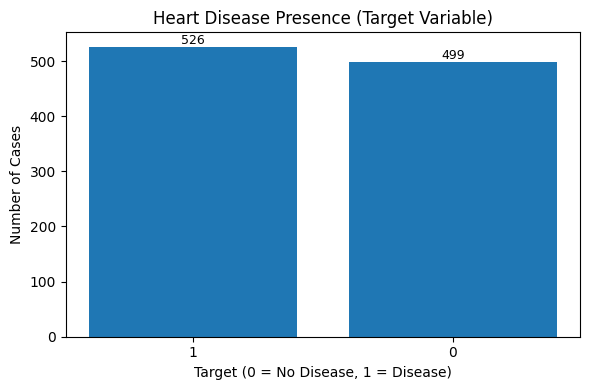

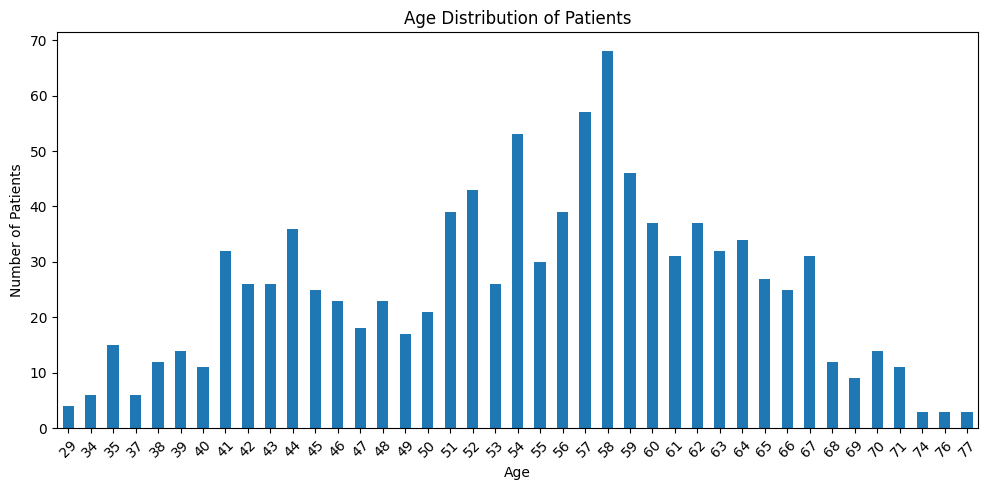

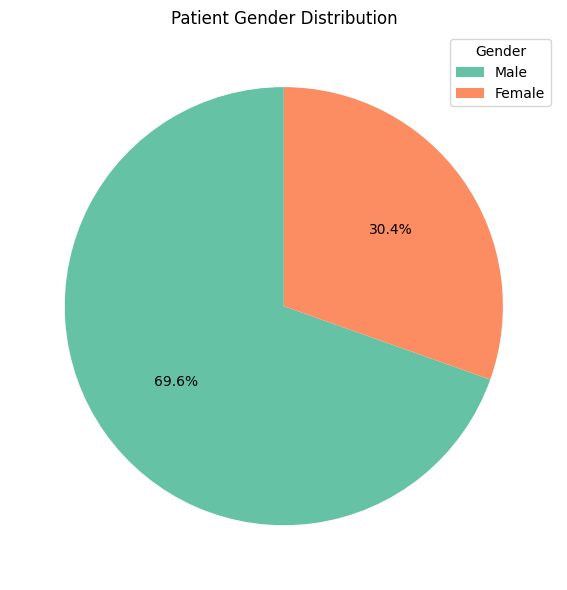

In [15]:
import matplotlib.pyplot as plt

# Bar chart: Count of target (disease presence)
plt.figure(figsize=(6, 4))
bars = plt.bar(cases_by_target.index.astype(str), cases_by_target.values)
plt.title("Heart Disease Presence (Target Variable)")
plt.ylabel("Number of Cases")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Bar chart: Age distribution
plt.figure(figsize=(10, 5))
age_group_cases.plot(kind="bar", title="Age Distribution of Patients")
plt.ylabel("Number of Patients")
plt.xlabel("Age")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie chart: Gender distribution
plt.figure(figsize=(6, 6))
colors = plt.get_cmap("Set2").colors
patches, texts, _ = plt.pie(gender_cases, labels=None, autopct='%1.1f%%', colors=colors, startangle=90)

plt.legend(patches, gender_cases.index.map({0: 'Female', 1: 'Male'}), title="Gender", loc="best")
plt.title("Patient Gender Distribution")
plt.tight_layout()
plt.show()


In [19]:
pip install ipywidgets


In [22]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Load dataset
covid_dataframe_filtered = pd.read_csv("/mnt/data/heart.csv")

# Dropdown for sex selection
sex_dropdown = widgets.Dropdown(
    options=sorted(covid_dataframe_filtered["sex"].unique()),
    description="Sex:"
)

# Function to show data per selected sex
def show_data_by_sex(sex):
    display(covid_dataframe_filtered[covid_dataframe_filtered["sex"] == sex].head())

# Interactive widget
widgets.interact(show_data_by_sex, sex=sex_dropdown)


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/heart.csv'

In [24]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Load the dataset
df = pd.read_csv("heart.csv")

# Dropdown to choose which column to filter
column_dropdown = widgets.Dropdown(
    options=['sex', 'cp', 'thal', 'target'],
    description="Filter by:"
)

# Function to update value dropdown based on selected column
def update_value_dropdown(column):
    unique_values = sorted(df[column].unique())
    value_dropdown.options = unique_values

# Value dropdown (will be populated dynamically)
value_dropdown = widgets.Dropdown(
    description="Value:"
)

# Function to display filtered data
def show_filtered_data(column, value):
    filtered_df = df[df[column] == value]
    display(filtered_df.head())

# Link dropdowns
widgets.interact(update_value_dropdown, column=column_dropdown)
widgets.interact(show_filtered_data, column=column_dropdown, value=value_dropdown)


interactive(children=(Dropdown(description='Filter by:', options=('sex', 'cp', 'thal', 'target'), value='sex')…

interactive(children=(Dropdown(description='Filter by:', options=('sex', 'cp', 'thal', 'target'), value='sex')…

<function __main__.show_filtered_data(column, value)>